In [10]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

with open('Session1H.pkl', 'rb') as f:
    data = pickle.load(f)

In [11]:
data.keys()

dict_keys(['D', 'id_eye', 'id_left', 'id_neuron', 'id_short', 'id_trial', 'sp_times', 't_p', 't_s'])

In [38]:
print(np.array(data["D"].shape))

[1200   16  945]


In [141]:
R=np.array(data["D"])
R[0,0,9:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [43]:
data_trim_time= R[np.isnan(R[:,:,0]).sum(axis=1)<16,:,0]

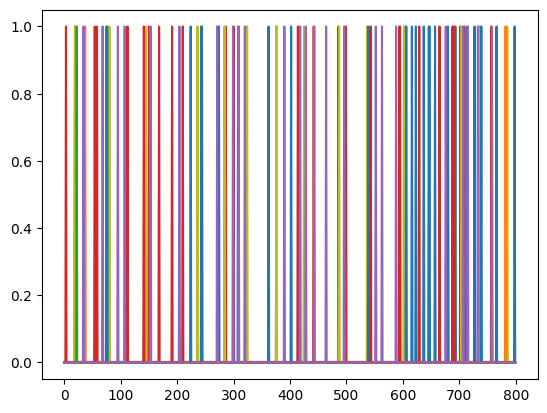

In [49]:
plt.plot(data_trim_time)

In [ ]:
def slider(spikes,time_window=100):
    fr=[]
    for i in range(time_window,len(spikes)):
        fr.append(np.nansum((spikes[max(0,i-time_window):i])))
    return np.array(fr)
slider(R[:,10,0])

In [ ]:
plt.plot(slider(R[:,10,:4]))

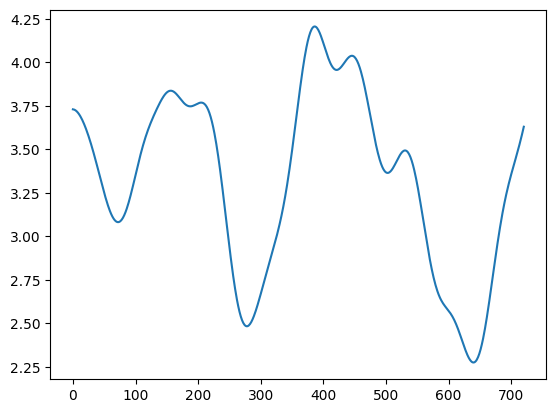

In [198]:
from scipy.ndimage import gaussian_filter1d
plt.plot(gaussian_filter1d(slider(R[:,10,5]),20))

In [199]:
from scipy.signal import find_peaks
a=find_peaks(gaussian_filter1d(slider(R[:,10,5]),25))
len(a[0])

3

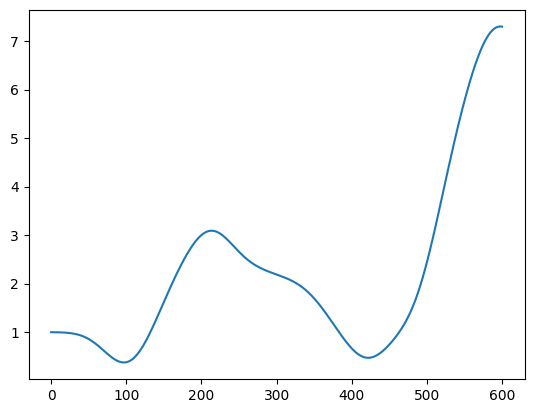

In [200]:
def pre_process(data):
    return gaussian_filter1d(slider(data),25)

plt.plot(pre_process(R[:,10,0]))

In [ ]:
newR=np.zeros(shape=(16,945))
print(newR.shape)
for i in range(16):
    for j in range(945):
        newR[i,j]=len(find_peaks(pre_process(R[:,i,j]))[0])

(16, 945)


In [ ]:
newR.shape

(16, 945)